In [ ]:
import utils
from typing import List
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np

# Day 03

https://adventofcode.com/2019/day/3

We have two wires, need to figure out at what coordinates they cross closest to the central port, which is `(0,0)`, then get the manhatten distance.

In [ ]:
test_inp = """R75,D30,R83,U83,L12,D49,R71,U7,L72
U62,R66,U55,R34,D71,R55,D58,R83"""

# cause namedtuples are nice and clear
Move = namedtuple("Move", ["dir", "dist"])

def parse_wire(wire):
    return [Move(w[0], int(w[1:])) for w in wire]

def parse_input(day=3, test=None) -> List[str]:
    """parses input to a list of ints"""
    if test:
        inp = test_inp
    else:
        inp = utils.get_input(day)
    
    a, b = inp.strip().splitlines()
    a, b = a.split(","), b.split(",")
    
    return parse_wire(a), parse_wire(b)
 
a, b = parse_input()
a[:2], b[:2]

([Move(dir='R', dist=991), Move(dir='U', dist=77)],
 [Move(dir='L', dist=997), Move(dir='U', dist=989)])

In [ ]:
# helper utils

def overlapping_points(points1, points2):
    overlap = set(points1).intersection(points2)
    overlap.remove((0,0))
    return overlap
    
def manhatten_distance(p1, p2=(0,0)):
    return sum([abs(x-y) for x,y in zip(p1, p2)])

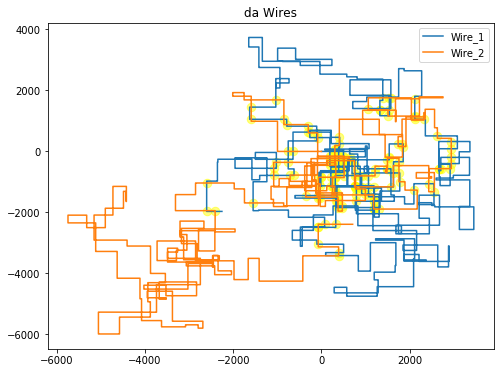

In [ ]:
# dict to convert move direction to numbers
m = {"U": ( 0,  1),
     "D": ( 0, -1),
     "L": (-1,  0),
     "R": ( 1,  0)}
     
def get_points(wire):
    pos = tuple([0,0]) # starting position
    points = [pos]     # list holding all points
    
    for move in wire:
        step = m[move.dir]   # direction wire is moving in
        
        for _ in range(move.dist):
            pos = tuple([i +j for i, j in zip(pos, step)])
            points.append(pos)
    return points


def plot_wires(wire1, wire2):
    fig, ax = plt.subplots(figsize=(8,6))
    
    points1 = get_points(wire1)
    points2 = get_points(wire2)
    overlap = overlapping_points(points1, points2)
    
    for i, points in enumerate([points1, points2]):
        x, y = zip(*points)
        ax.plot(x, y, label=f"Wire_{i+1}")
    
    # highlight overlaps
    x, y = zip(*overlap)
    ax.scatter(x, y, alpha=0.5, s=max(x)//40, 
               marker="o", color="yellow")    
    
    ax.set_title("da Wires")
    ax.legend()
    plt.show()
    
plot_wires(a, b)

In [ ]:
def solve_1():
    wire1, wire2 = parse_input()
    
    points1 = get_points(wire1)
    points2 = get_points(wire2)
    
    overlap = overlapping_points(points1, points2)
    
    min_dist = 1000000
    ans = None
    for point in overlap:
        distance = manhatten_distance(point)
        if distance < min_dist:
            min_dist = distance
            ans = point
            
    return min_dist
            
    
solve_1()

303

## Part 2

Calc num of steps each wire takes to reach each intersection, and find the intersection with the fewest combined steps for both wires to reach. Use the step from the first time the wire reaches that point.

In [ ]:
def solve_2():
    wire1, wire2 = parse_input()
    
    points1 = get_points(wire1)
    points2 = get_points(wire2)
    
    overlap = overlapping_points(points1, points2)
    
    min_step = 100000
    best_point = None
    
    for point in overlap:
        steps = points1.index(point) + points2.index(point)
        if steps <= min_step:
            min_step = steps
            best_point = point
            
    return min_step, best_point
    
solve_2()

(11222, (499, -179))

`11222` is the correct answer